In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

from scripts import utils, plotter, peak

In [2]:
cfg = utils.load_config()

## Read  and preprocess data

In [3]:
df_all = utils.load_tom_data("data/tom_measuredValues.csv")
df_target = utils.load_tom_data("data/tom_targetValues.csv")

df_target.head()

,Time (h) 2022-10-13T07.07.00.130,OTR (mmol/L/h) Flask A1,CTR (mmol/L/h) Flask A1,RQ Flask A1,integral OTR (mmol/L) Flask A1,integral CTR (mmol/L) Flask A1,O2 cal. factor (Pa/V) Flask A1,Time (h) 2022-10-13T07.07.01.278,OTR (mmol/L/h) Flask A2,CTR (mmol/L/h) Flask A2,...,integral OTR (mmol/L) Flask A3,integral CTR (mmol/L) Flask A3,O2 cal. factor (Pa/V) Flask A3,Time (h) 2022-10-13T07.07.01.396,OTR (mmol/L/h) Flask A4,CTR (mmol/L/h) Flask A4,RQ Flask A4,integral OTR (mmol/L) Flask A4,integral CTR (mmol/L) Flask A4,O2 cal. factor (Pa/V) Flask A4
0,0.33524,2.456922,0.312320,0.127118,0.818974,0.104107,10507.314185,0.33522,1.113009,0.329919,...,0.509396,0.099698,10477.446193,0.33383,1.042200,0.325750,0.312560,0.347400,0.108583,11242.182864
1,0.66858,1.310552,0.344044,0.262518,1.255825,0.218788,10579.045884,0.66856,0.371913,0.366057,...,0.576296,0.214880,10363.195043,0.66856,-0.791187,0.360874,-0.456117,0.083671,0.228875,11092.473443
2,1.00331,1.173575,0.431764,0.367904,1.647016,0.362709,10551.246878,1.00190,0.370201,0.418188,...,0.576862,0.361904,10395.580343,1.00191,-0.225415,0.396026,-1.756871,0.008532,0.360883,11127.230206
3,1.33667,0.850758,0.484061,0.568976,1.930602,0.524063,10583.964265,1.33665,0.269537,0.460731,...,0.515304,0.528796,10381.622636,1.33665,-0.033057,0.473453,-14.322203,-0.002487,0.518701,11093.183828
4,1.67141,0.059671,0.579527,9.711980,1.950493,0.717238,10588.528742,1.67000,0.531913,0.525056,...,1.258462,0.714655,10366.617881,1.67001,2.851179,0.515628,0.180847,0.947906,0.690577,11105.966006


In [4]:
# Select data from a single flask:
df = utils.filter_data_tom_flask(df_all, " Flask A2", offset=0)
df_ctr = utils.filter_data_tom_flask(df_target, " Flask A2", offset=0)

display(df.head())
display(df_ctr.head())

c:\Users\Utilizador\Desktop\Vários\Coding\ctr-correct\scripts\utils.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out["Time [h]"] = None
c:\Users\Utilizador\Desktop\Vários\Coding\ctr-correct\scripts\utils.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out["Time [h]"] = df[df.columns[0]] + offset
c:\Users\Utilizador\Desktop\Vários\Coding\ctr-correct\scripts\utils.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

,ambient temperature [°C],ambient humidity [%],ambient pressure [mBar],CO2 conc. [%],O2 conc. [%],Time [h]
0,42.53,15.90,1016.65,0.051,20.483,0.00000
1,42.54,15.86,1016.65,0.052,20.488,0.00139
2,42.55,15.77,1016.67,0.052,20.495,0.00278
3,42.55,15.76,1016.67,0.052,20.497,0.00417
4,42.56,15.51,1016.67,0.053,20.500,0.00556


,OTR [mmol/L/h],CTR [mmol/L/h],RQ,integral OTR [mmol/L],integral CTR [mmol/L],O2 cal. factor [Pa/V],Time [h]
0,1.113009,0.329919,0.296421,0.371003,0.109973,9662.911550,0.33524
1,0.371913,0.366057,0.984252,0.494974,0.231992,9652.537667,0.66858
2,0.370201,0.418188,1.129626,0.618374,0.371388,9651.312625,1.00331
3,0.269537,0.460731,1.709344,0.708220,0.524965,9664.454849,1.33667
4,0.531913,0.525056,0.987110,0.885524,0.699984,9652.066360,1.67141


In [5]:
# Convert c_CO2 to ln(c_CO2):
df["lnCO2"] = np.log(df["CO2 conc. [%]"])
df.head()

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_6936\2266391241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["lnCO2"] = np.log(df["CO2 conc. [%]"])


,ambient temperature [°C],ambient humidity [%],ambient pressure [mBar],CO2 conc. [%],O2 conc. [%],Time [h],lnCO2
0,42.53,15.90,1016.65,0.051,20.483,0.00000,-2.975930
1,42.54,15.86,1016.65,0.052,20.488,0.00139,-2.956512
2,42.55,15.77,1016.67,0.052,20.495,0.00278,-2.956512
3,42.55,15.76,1016.67,0.052,20.497,0.00417,-2.956512
4,42.56,15.51,1016.67,0.053,20.500,0.00556,-2.937463


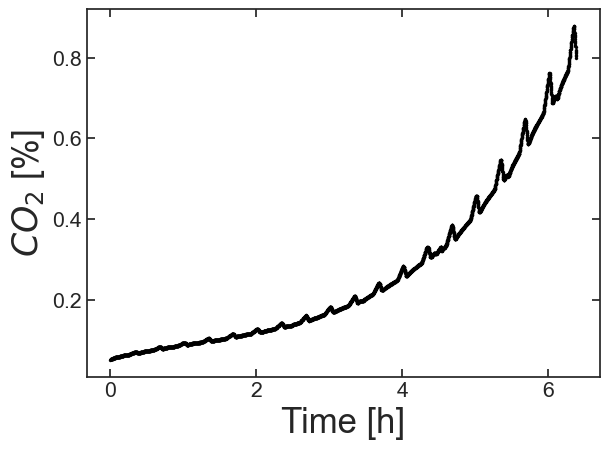

In [6]:
plotter.plot_signal(df, var="CO2 conc. [%]", peak_idx=[])
plt.ylabel(r"$CO_2$ [%]")

plt.tight_layout()
plt.savefig("plots/co2-profile.png")
plt.show()

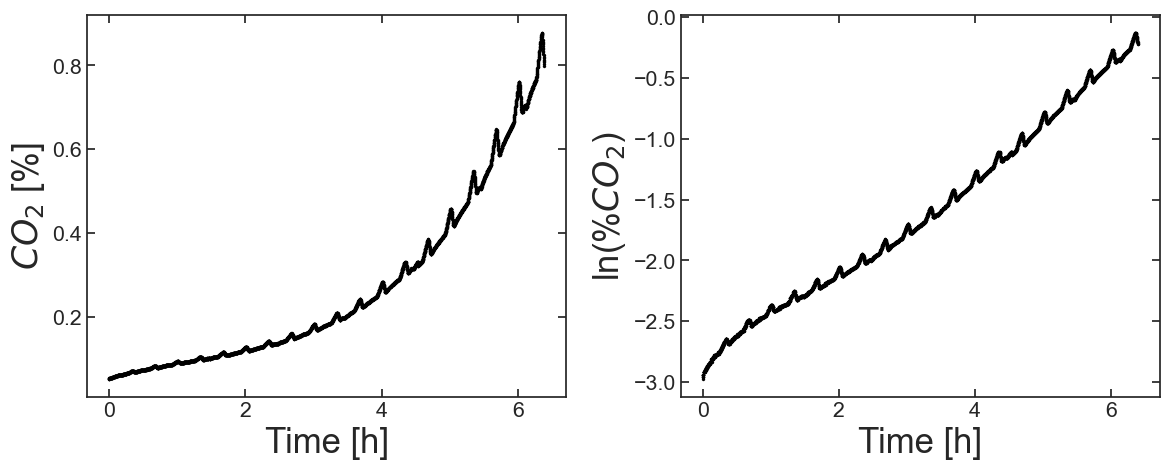

In [7]:
f, ax = plt.subplots(1, 2, figsize=(12, 5))

plotter.plot_signal(df, var="CO2 conc. [%]", peak_idx=[], ax=ax[0])
plotter.plot_signal(df, var="lnCO2", peak_idx=[], ax=ax[1])
ax[0].set_ylabel(r"$CO_2$ [%]")
ax[1].set_ylabel(r"ln(%$CO_2$)")

plt.tight_layout()
plt.savefig("plots/co2-profile_2.png")
plt.show()

## Find peaks

In [8]:
# Obtain indices of all detected peaks:
peak_array, _ = find_peaks(df["lnCO2"], 
                          prominence=0.05, 
                          width=20)
peak_array

array([ 727,  968, 1207, 1210, 1447, 1452, 1687, 1928, 2169, 2409, 2649,
       2890, 3126, 3136, 3371, 3611, 3851, 4093, 4333, 4573], dtype=int64)

In [9]:
# Remove peaks that are too close together:
filt_peaks = utils.filter_values(peak_array, min_distance=30)
filt_peaks

array([ 727,  968, 1207, 1447, 1687, 1928, 2169, 2409, 2649, 2890, 3126,
       3371, 3611, 3851, 4093, 4333, 4573], dtype=int64)

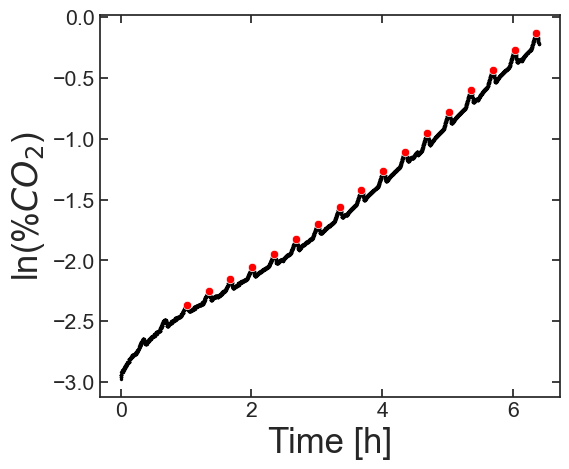

In [10]:
f, ax = plt.subplots(figsize=(6,5))
plotter.plot_signal(df, var="lnCO2", peak_idx=filt_peaks, ax=ax, window=(0, 0))
plt.ylabel(r"ln(%$CO_2$)")

plt.tight_layout()
plt.savefig("plots/co2-profile_with-peaks.png")
plt.show()

## Determine appropriate size for window around peak

In [11]:
window_before_peak = 60
window_after_peak = 25

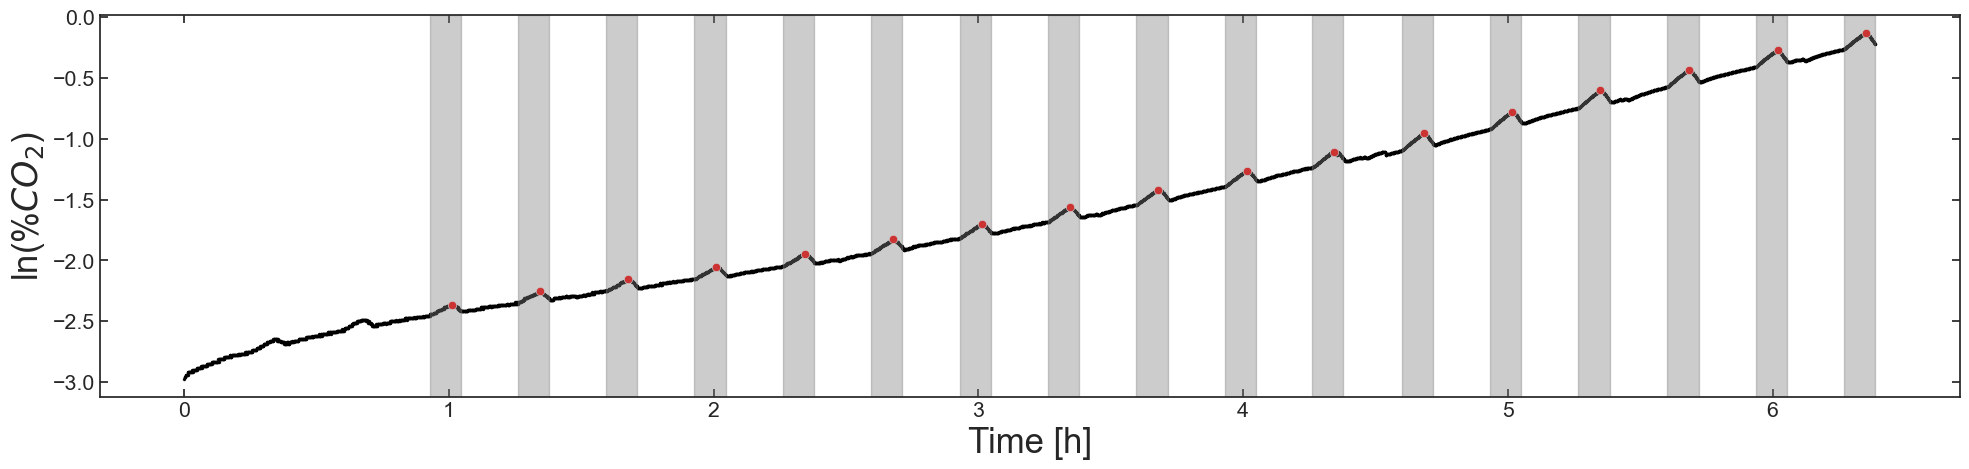

In [12]:
f, ax = plt.subplots(figsize=(20,5))
plotter.plot_signal(df, var="lnCO2", peak_idx=filt_peaks, ax=ax, window=(window_before_peak, window_after_peak))
plt.ylabel(r"ln(%$CO_2$)")

plt.tight_layout()
plt.savefig("plots/co2-profile_with-peaks-and-windows.png")
plt.show()

In [13]:
list_of_peaks = []

for pk in filt_peaks:
    print(pk)
    p = peak.Peak(peak_index=pk, 
                  df=df, 
                  start_peak_index=pk-window_before_peak,
                  end_peak_index=pk+window_after_peak,
                  neighborhood_window=40)
    
    list_of_peaks.append(p)
list_of_peaks

727
968
1207
1447
1687
1928
2169
2409
2649
2890
3126
3371
3611
3851
4093
4333
4573


## Correct CTR values for changing baseline:

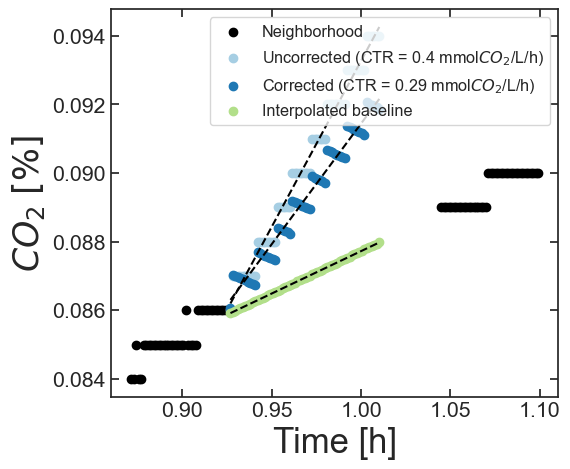

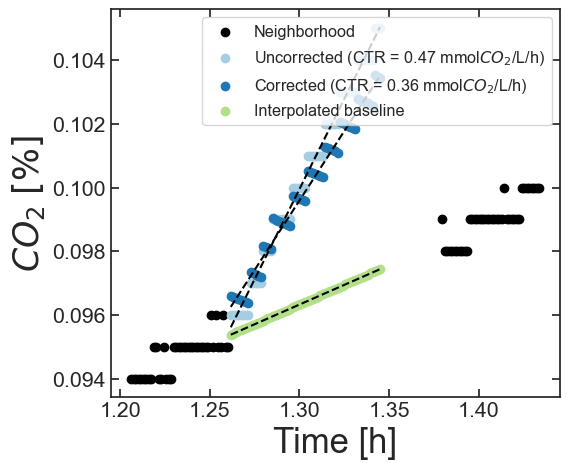

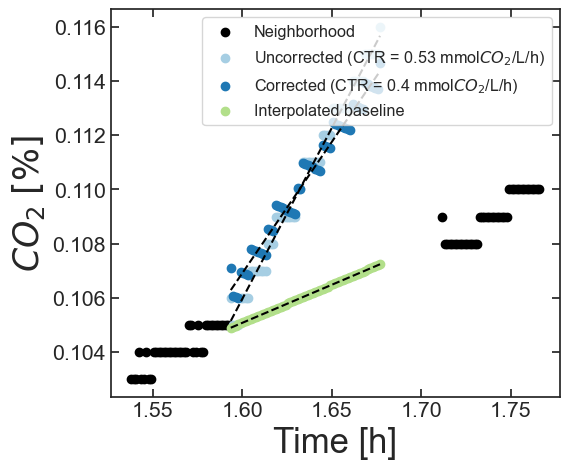

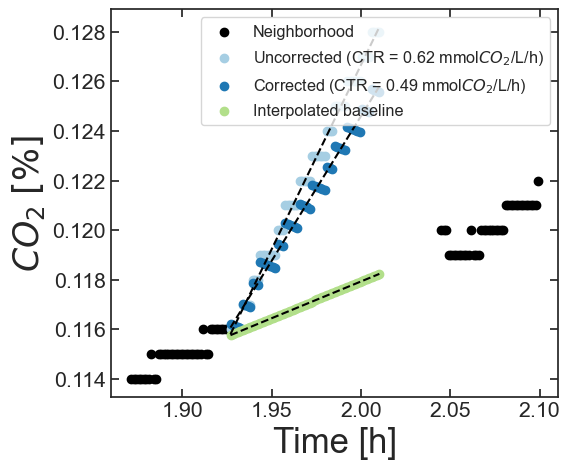

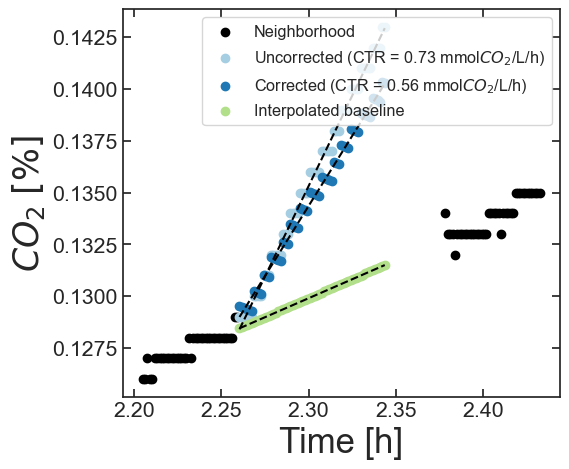

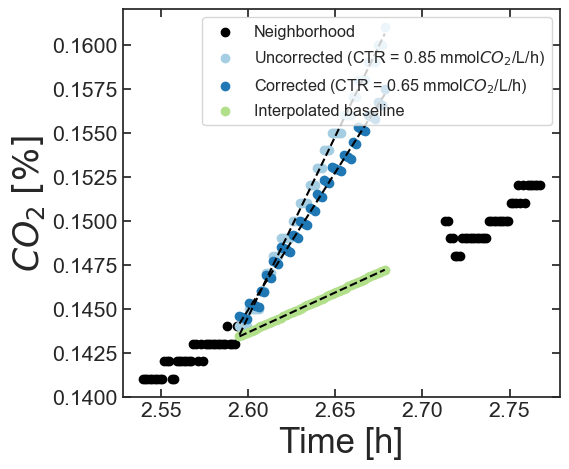

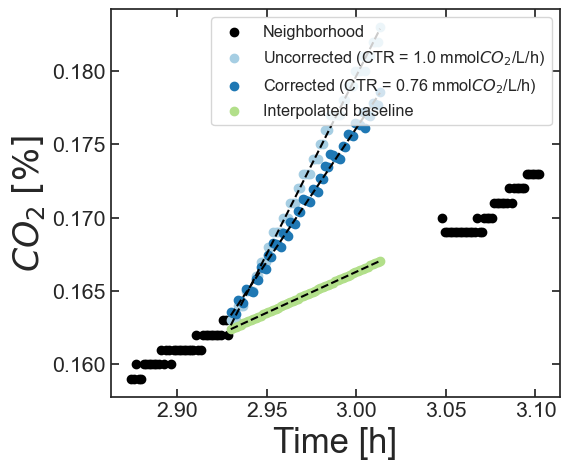

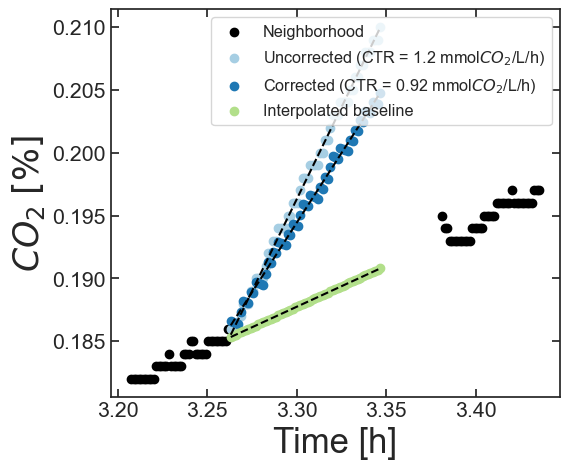

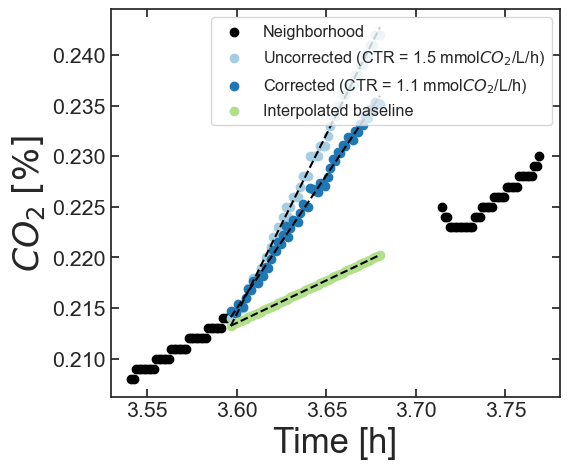

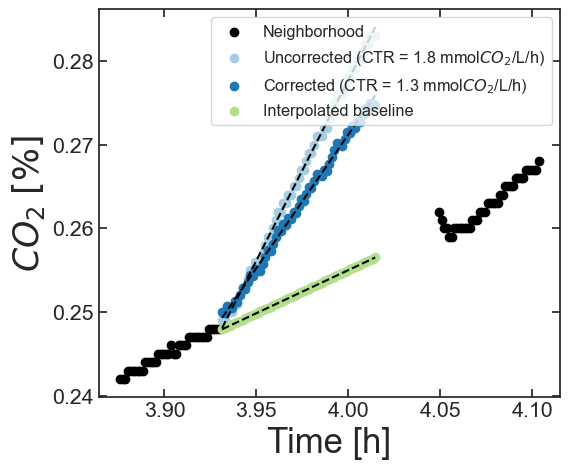

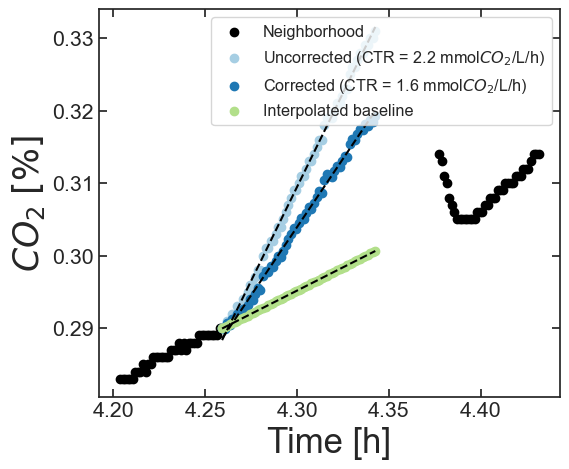

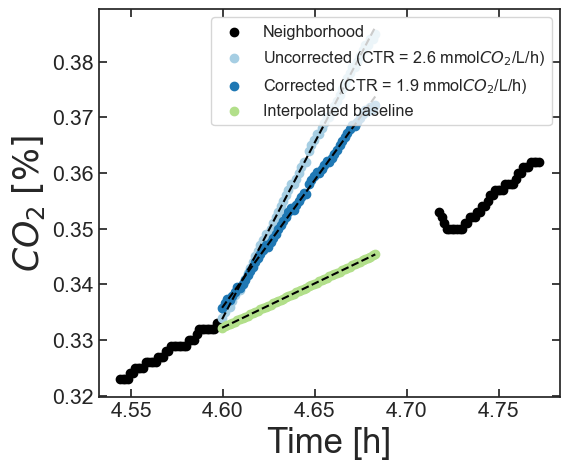

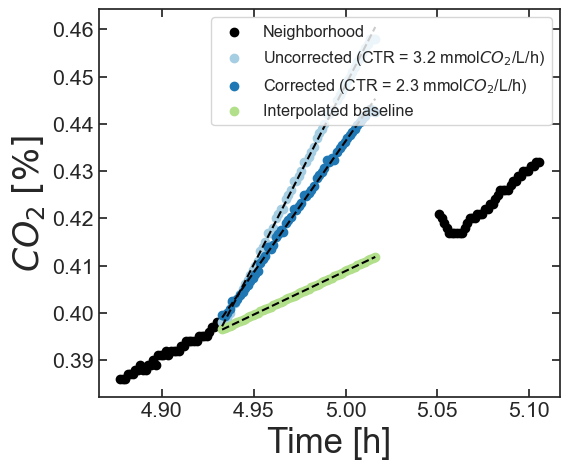

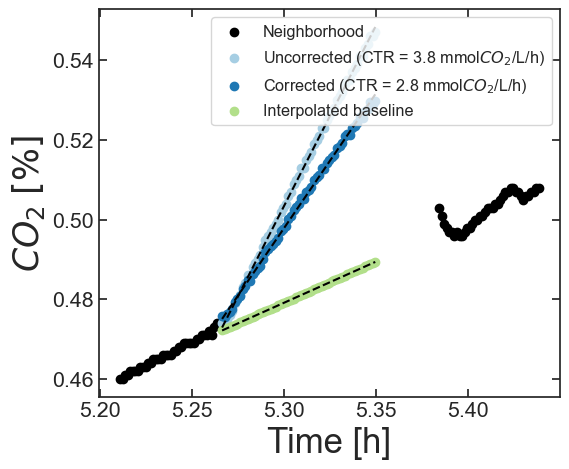

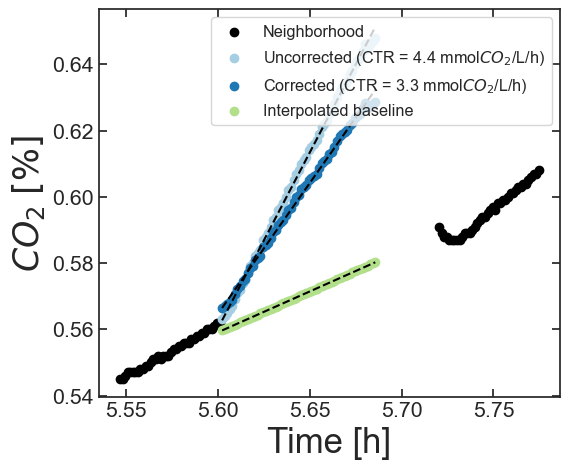

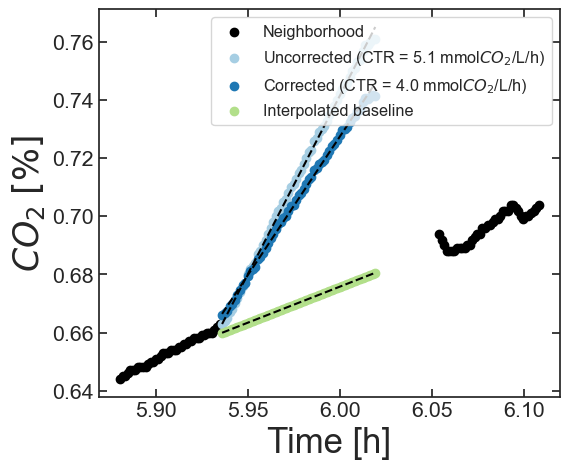

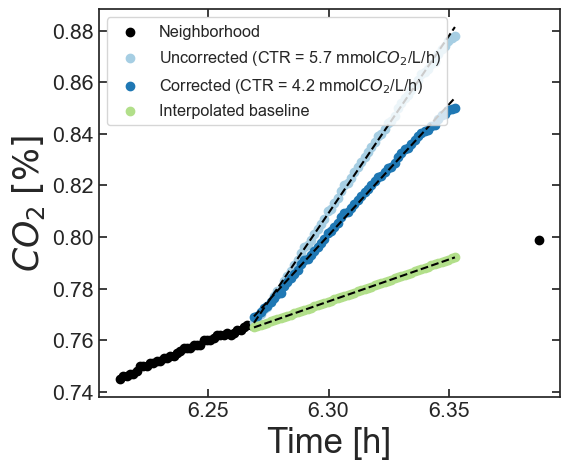

In [14]:
for i, p  in enumerate(list_of_peaks):
    ax = p.plot_ctr_correction()
    plt.tight_layout()
    plt.savefig(f"plots/correction_peak-{i}.png")
    plt.show()

## Comparison of corrected and uncorrected CTR values:

In [15]:
# Retrieve values from all peaks:
ctr = np.array([utils.convert_slope_to_CTR(p.compute_slope(which="uncorrected"),
                                           v_molar=25.45, v_liquid=50, v_headspace=530) 
                for p in list_of_peaks])

ctr_corr = np.array([utils.convert_slope_to_CTR(p.compute_slope(which="corrected"),
                                                v_molar=25.45, v_liquid=50, v_headspace=530)
                     for p in list_of_peaks])

t = np.array([p.peak_vertex["Time [h]"] for p in list_of_peaks])


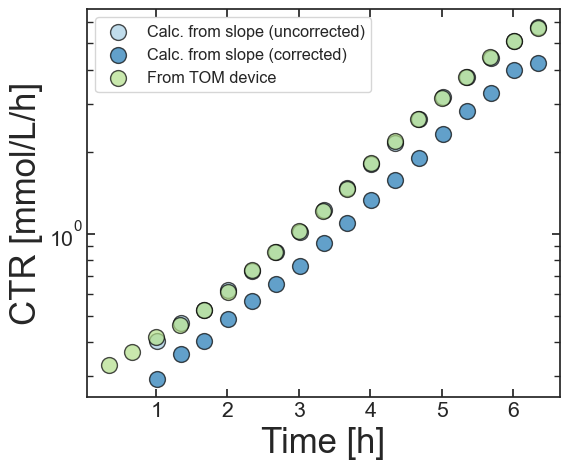

In [16]:
f, ax = plt.subplots(figsize=(6,5))
ax.scatter(t, ctr, label="Calc. from slope (uncorrected)", **cfg["settings_scatterplots"])
ax.scatter(t, ctr_corr, label="Calc. from slope (corrected)", **cfg["settings_scatterplots"])
ax.scatter(df_ctr["Time [h]"], df_ctr["CTR [mmol/L/h]"], label="From TOM device", **cfg["settings_scatterplots"])

ax.legend(fontsize="x-small")
ax.set_ylabel("CTR [mmol/L/h]")
ax.set_xlabel("Time [h]")
ax.set_yscale("log")

plt.tight_layout()
plt.savefig("plots/calculated-CTRs.png")
plt.show()

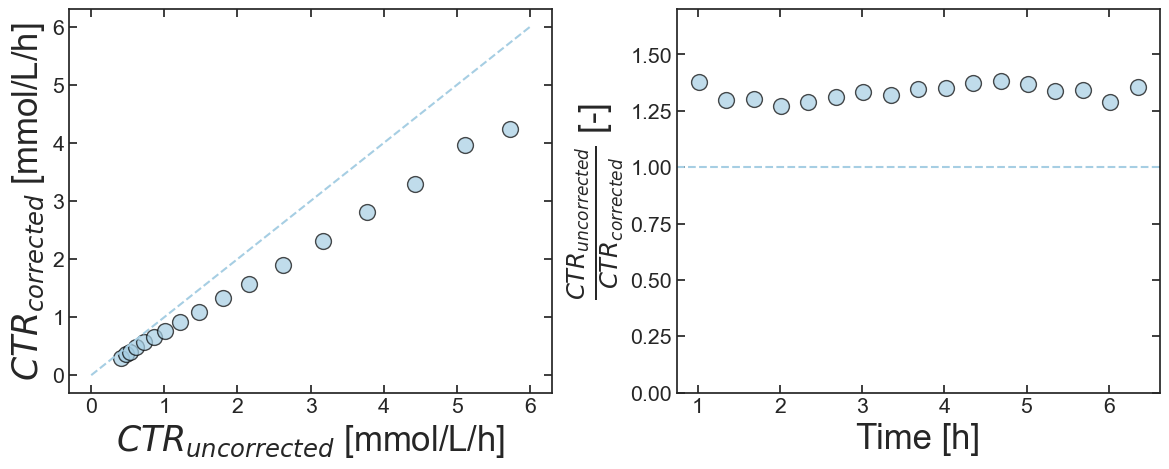

In [17]:
f, ax = plt.subplots(1, 2, figsize=(12,5))

ratio = ctr / ctr_corr

ax[0].scatter(ctr, ctr_corr, **cfg["settings_scatterplots"])
ax[0].plot([0, 6], [0, 6], linestyle="--")
ax[0].set_xlabel("$CTR_{uncorrected}$ [mmol/L/h]")
ax[0].set_ylabel("$CTR_{corrected}$ [mmol/L/h]")

ax[1].scatter(t, ratio, **cfg["settings_scatterplots"])
ax[1].set_ylim([0, 1.7])
ax[1].axhline(y=1, linestyle="--")
ax[1].set_xlabel("Time [h]")
ax[1].set_ylabel(r"$\frac{CTR_{uncorrected}}{CTR_{corrected}}$ [-]")

plt.tight_layout()
plt.savefig("plots/comparison-CTRs.png")
plt.show()